# **Name:** Srinvas Natarajan
# **Date:** 21st January 2022
# **Topic:** Hamoye Stage B

<br>

---

## **A. Loading Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DATA_PATH = "/content/drive/My Drive/Internship Files/Hamoye/Data/"

In [4]:
df = pd. read_csv(DATA_PATH + "energydata_complete.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## **B. EDA**

In [ ]:
print("Null Values:\n\n", df.isnull().sum())

In [6]:
print("Duplicated Values: \n\n", df.duplicated().any())

Duplicated Values: 

 False


In [8]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [11]:
print('The number of rows in dataset is: ' , df.shape[0])
print('The number of columns in dataset is: ' , df.shape[1])

The number of rows in dataset is:  19735
The number of columns in dataset is:  29


<br> 

## **C. Preprocessing**

In [5]:
col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
col_weather = ["T_out", "Tdewpoint", "RH_out", "Press_mm_hg", "Windspeed", "Visibility"] 
col_light = ["lights"]
col_randoms = ["rv1", "rv2"]
col_target = ["Appliances"]

In [6]:
feature_vars = df[col_temp + col_hum + col_weather + col_light + col_randoms ] 
target_vars = df[col_target]

In [7]:
feature_vars.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828,40.259739,40.420420,39.242500,39.026904,50.949283,54.609083,35.388200,42.936165,41.552401,7.411665,3.760707,79.750418,755.522602,4.039752,38.330834,3.801875,24.988033,24.988033
std,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712,3.979299,4.069813,3.254576,4.341321,9.022034,31.149806,5.114208,5.224361,4.151497,5.317409,4.194648,14.901088,7.399441,2.451221,11.794719,7.935988,14.496634,14.496634
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667,-5.000000,-6.600000,24.000000,729.300000,0.000000,1.000000,0.000000,0.005322,0.005322
25%,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000,37.333333,37.900000,36.900000,35.530000,45.400000,30.025000,31.500000,39.066667,38.500000,3.666667,0.900000,70.333333,750.933333,2.000000,29.000000,0.000000,12.497889,12.497889
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375000,40.900000,6.916667,3.433333,83.666667,756.100000,3.666667,40.000000,0.000000,24.897653,24.897653
75%,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000,43.066667,43.260000,41.760000,42.156667,53.663333,83.226667,39.000000,46.536000,44.338095,10.408333,6.566667,91.666667,760.933333,5.500000,40.000000,0.000000,37.583769,37.583769
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667,26.100000,15.500000,100.000000,772.300000,14.000000,66.000000,70.000000,49.996530,49.996530


In [8]:
feature_vars.lights.value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
70        1
60        1
Name: lights, dtype: int64

In [9]:
feature_vars.drop(['lights'], axis=1 , inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


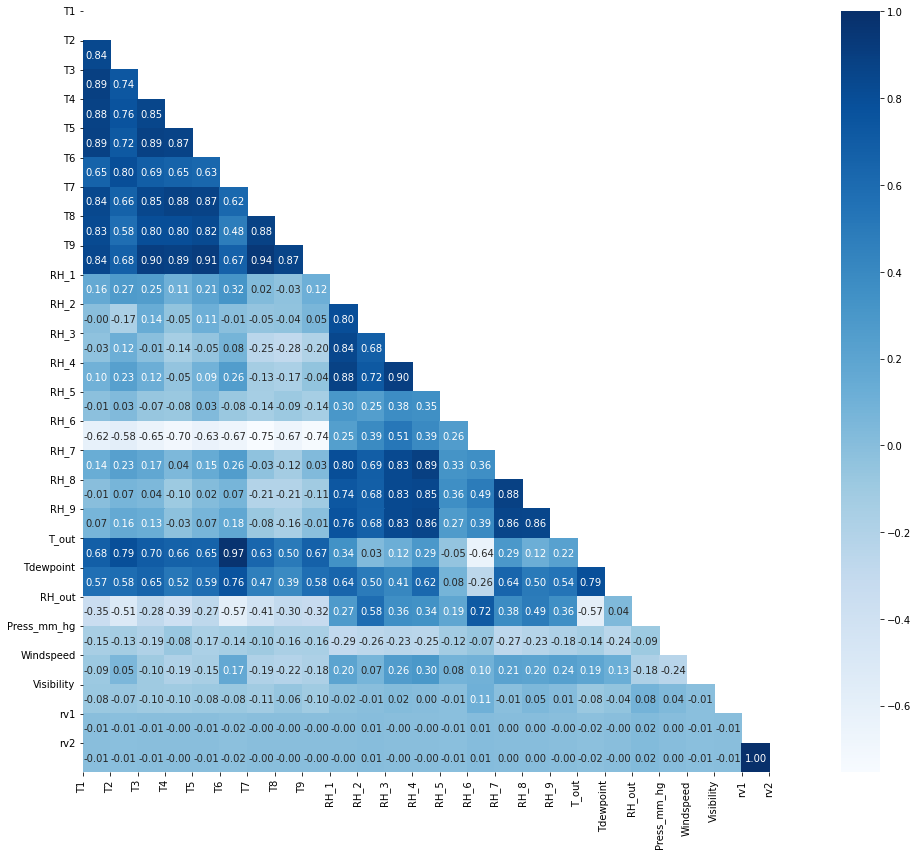

In [10]:
corr = feature_vars.corr()

# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))

sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask, cmap="Blues")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [11]:
def get_redundant_pairs(df):
  pairs_to_drop = set()
  cols = df.columns
  for i in range(0, df.shape[1]):
      for j in range(0, i+1):
          pairs_to_drop.add((cols[i], cols[j]))
  return pairs_to_drop

In [12]:
def get_top_abs_correlations(df, n=5):
  au_corr = df.corr().abs().unstack()
  labels_to_drop = get_redundant_pairs(df)
  au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
  return au_corr[0:n]

In [ ]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(feature_vars, 40))

In [14]:
feature_vars.drop(["rv1","rv2","Visibility","T6","T9"],axis=1 , inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
X = feature_vars
y = df[col_target]

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
print("X_train, y_train", X_train.shape, y_train.shape)
print("X_test, y_test", X_test.shape, y_test.shape)

X_train, y_train (14801, 21) (14801, 1)
X_test, y_test (4934, 21) (4934, 1)


In [28]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

sc_train = pd.DataFrame(columns=train.columns , index=train.index)
sc_train[sc_train.columns] = sc.fit_transform(train)
sc_test= pd.DataFrame(columns=test.columns , index=test.index)
sc_test[sc_test.columns] = sc.fit_transform(test)

In [29]:
train_X =  sc_train.drop(['Appliances'] , axis=1)
train_y = sc_train['Appliances']

test_X =  sc_test.drop(['Appliances'] , axis=1)
test_y = sc_test['Appliances']

<br>

## **D. Models**

In [33]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing, model_selection, metrics

In [31]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [34]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

[06:15:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [37]:
df_results = pd.DataFrame(model_data)
df_results.head(8)

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,0.020358,0.000000,0.000000,1.000000
1,Ridge:,0.033587,0.136871,0.124582,0.935638
2,KNeighborsRegressor:,0.002930,0.679905,0.489865,0.714238
3,SVR:,13.862324,0.238333,0.216393,0.885216
4,RandomForest,31.012209,0.939792,0.561615,0.662106
5,ExtraTreeRegressor :,7.529924,1.000000,0.648319,0.593027
6,GradientBoostingClassifier:,7.099666,0.330104,0.234927,0.874685
7,XGBRegressor:,1.526368,0.324989,0.241516,0.870910


## **D. Questions**

### **Q11.** What is the total sum of Animal Fat produced in 2014 and 2017 respectively?

In [ ]:
pd.DataFrame(df.groupby('Item').sum()).loc["Animal fats", ["Y2014", "Y2017"]]

Y2014    209460.54
Y2017    269617.53
Name: Animal fats, dtype: float64

### **Q12.** What is the mean and standard deviation across the whole dataset for the year 2015 to 3 decimal places?

In [ ]:
print( round(df.mean()['Y2015'], 3) )
print( round(df.std()['Y2015'], 3) )

135.236
1603.404


### **Q13.** What is the total number and percentage of missing data in 2016 to 2 decimal places?

In [ ]:
print(df.isnull().sum()['Y2016'])
print( round((df.isnull().sum()['Y2016'] / df.shape[0])*100,2), "%" )

1535
2.52 %


### **Q14.** Which year had the highest correlation with ‘Element Code’?  

In [ ]:
df.corr()['Element Code'].nlargest(2)

Element Code    1.000000
Y2014           0.024457
Name: Element Code, dtype: float64

### **Q15.** What year has the highest sum of Import Quantity?

In [ ]:
pd.DataFrame(df.groupby(['Element']).sum()).loc["Import Quantity", ["Y2014","Y2015","Y2016","Y2017","Y2018"]].nlargest(1)

Y2017    294559.09
Name: Import Quantity, dtype: float64

### **Q16.** What is the total number of the sum of Production in 2014

In [ ]:
round( pd.DataFrame(df.groupby(['Element']).sum()).loc['Production',"Y2014"], 2)


1931287.75

### **Q17.** Which of these elements had the highest sum in 2018

In [ ]:
temp_df = (df.loc[:,['Element',"Y2018"]].groupby("Element").sum()).sort_values(by=['Y2018'], ascending=False )
print(temp_df["Y2018"].nlargest(1))

Element
Domestic supply quantity    2161192.1
Name: Y2018, dtype: float64


### **Q18.** Which of these elements had the 3rd lowest sum in 2018

In [ ]:
temp_df["Y2018"].nsmallest(3)

Element
Tourist consumption                          90.00
Fat supply quantity (g/capita/day)        10258.69
Protein supply quantity (g/capita/day)    11833.56
Name: Y2018, dtype: float64

### **Q19.** What is the total Import Quantity in Algeria in 2018

In [ ]:
temp_df = pd.DataFrame(df.groupby(['Area','Element']).sum())
temp_df.loc["Algeria"].loc["Import Quantity","Y2018"]

36238.29

### **Q20.** What is the total number of unique countries in the dataset

In [ ]:
len(pd.unique(df['Area']))

49